In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [37]:
df=pd.read_csv('data/loan_2014_18.csv')

In [39]:
df.head(10)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,120122535,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,119374887,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,...,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,123.08000,6189.66,1062.71,N
2,2,119321612,40000.0,40000.0,40000.0,60 months,15.05%,952.65,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,120122034,16000.0,16000.0,16000.0,36 months,7.97%,501.17,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,118659541,33000.0,33000.0,33000.0,36 months,7.21%,1022.12,A,A3,...,Feb-2020,Apr-2020,Feb-2020,3.0,21.0,DELINQUENT,177.96231,10197.78,59.68,N
5,5,119246018,7000.0,7000.0,7000.0,36 months,7.97%,219.26,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6,6,119183129,10000.0,10000.0,10000.0,36 months,9.44%,320.05,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
7,7,120086024,8000.0,8000.0,8000.0,36 months,16.02%,281.34,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
8,8,119417303,12800.0,12800.0,12800.0,36 months,13.59%,434.93,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,9,120020939,8000.0,8000.0,8000.0,36 months,11.99%,265.68,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [40]:
df = df.drop(df.columns[0], axis=1)
df.shape

(2029952, 141)

### Identifying the target (y)
dependent variable : In our dataset the dependent variable js the "loan_status" column. First we check what types of categories it can take, then map it values as follows: </br> 'Fully Paid', 'Current', 'In Grace Period' - are map as '1' - positive </br> 'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off', 'Default' - are map with '0' - negative

In [41]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Late (31-120 days)', 'Charged Off',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

In [43]:
# Define the mapping
loan_status_mapping = {
    'Fully Paid': 1,
    'Current': 1,
    'In Grace Period': 1,
    'Late (16-30 days)': 0,
    'Late (31-120 days)': 0,
    'Charged Off': 0,
    'Default': 0
}

# Apply the mapping to the 'Loan_Status' column
df['loan_status_binary'] = df['loan_status'].map(loan_status_mapping)
df.drop('loan_status', axis=1, inplace=True)

df['loan_status_binary'].value_counts()

loan_status_binary
1    1704881
0     325071
Name: count, dtype: int64

In [44]:
missing_df = df.isnull().sum().to_frame(name='Missing')
missing_df['Total Count'] = len(df)
missing_df['Non-Missing'] = df.count()
missing_df['Missing Percentage'] = (missing_df['Missing'] / len(df)) * 100

In [75]:
missing_df = missing_df[(missing_df['Missing']>0) & (missing_df['Missing Percentage']>50)]
columns_to_drop = missing_df.index.to_list()

In [78]:
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status_binary
0,120122535,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,associate,...,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,N,N,1
1,119374887,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,Nurse,...,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,Y,N,1
2,119321612,40000.0,40000.0,40000.0,60 months,15.05%,952.65,C,C4,Driver,...,0.0,0.0,0.0,367745.0,154261.0,64600.0,168145.0,N,N,1
3,120122034,16000.0,16000.0,16000.0,36 months,7.97%,501.17,A,A5,Senior Investigator,...,100.0,0.0,0.0,125018.0,128572.0,3700.0,96918.0,N,N,1
4,118659541,33000.0,33000.0,33000.0,36 months,7.21%,1022.12,A,A3,Registered Nurse,...,0.0,0.0,0.0,404510.0,48219.0,81700.0,73015.0,Y,N,0


In [96]:
(pd.DataFrame(df.isnull().sum())
.reset_index()
.rename(columns={'index': 'Column', 0: 'mis_count'})
.query('mis_count > 0')
)

,Column,mis_count
9,emp_title,152606
10,emp_length,137908
18,title,23305
19,zip_code,1
21,dti,1711
26,inq_last_6mths,1
27,mths_since_last_delinq,1024003
28,mths_since_last_record,1691921
32,revol_util,1587
44,last_pymnt_d,2190


### Checking the datatype of columns

In [99]:
df.select_dtypes(include=['object']).head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,...,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag
0,36 months,7.97%,A,A5,associate,10+ years,OWN,Source Verified,2017-09-01,n,...,CA,Jun-1996,37%,w,May-2020,NaN,May-2020,Individual,N,N
1,36 months,11.99%,B,B5,Nurse,10+ years,MORTGAGE,Source Verified,2017-09-01,n,...,NJ,Sep-2005,34.1%,w,May-2020,Jul-2020,May-2020,Individual,Y,N
2,60 months,15.05%,C,C4,Driver,9 years,MORTGAGE,Verified,2017-09-01,n,...,TX,Apr-2002,20.7%,w,May-2020,Jun-2020,May-2020,Individual,N,N
3,36 months,7.97%,A,A5,Senior Investigator,5 years,RENT,Not Verified,2017-09-01,n,...,VA,Jun-2000,57.7%,w,May-2020,Jun-2020,May-2020,Individual,N,N
4,36 months,7.21%,A,A3,Registered Nurse,< 1 year,MORTGAGE,Verified,2017-09-01,n,...,TX,Dec-2005,16.1%,w,Apr-2020,Jun-2020,May-2020,Joint App,Y,N


In [103]:
# df_dtypes = pd.DataFrame(df.dtypes)
# df_dtypes = df_dtypes.reset_index()
# # df_dtypes.columns = ['Column', 'Data Type']

# df_dtypes.columns = ['Column', 'Data Type']
# # df_groupBy = df_dtypes.groupby()
# df_dtypes

df.dtypes
dtypes_objectList = df.dtypes[df.dtypes == 'object'].index.tolist()
dtypes_objectList

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag']

In [83]:
correlationMatrix = df.drop(df.select_dtypes(include=['object']).columns, axis=1).corr()
correlationMatrix

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_binary
id,1.000000,0.025806,0.025806,0.025894,0.022160,0.014242,0.028117,-0.043619,0.149614,0.149613,...,-0.015240,0.011943,-0.170586,-0.008026,-0.042634,0.028363,0.013335,0.089436,0.037321,0.072928
loan_amnt,0.025806,1.000000,0.999999,0.999994,0.945133,0.191546,0.039401,-0.012645,0.114761,0.114759,...,-0.028616,0.090946,0.024318,-0.086571,0.006142,0.334921,0.275289,0.371370,0.208873,-0.038647
funded_amnt,0.025806,0.999999,1.000000,0.999995,0.945134,0.191546,0.039400,-0.012644,0.114761,0.114760,...,-0.028615,0.090945,0.024318,-0.086570,0.006142,0.334922,0.275290,0.371370,0.208873,-0.038648
funded_amnt_inv,0.025894,0.999994,0.999995,1.000000,0.945054,0.191555,0.039366,-0.012681,0.114878,0.114877,...,-0.028655,0.090981,0.024279,-0.086587,0.006116,0.334955,0.275281,0.371405,0.208868,-0.038614
installment,0.022160,0.945133,0.945134,0.945054,1.000000,0.184461,0.041711,-0.000927,0.058388,0.058388,...,-0.004878,0.071155,0.045150,-0.077192,0.013573,0.299397,0.257961,0.335499,0.192221,-0.042810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tot_hi_cred_lim,0.028363,0.334921,0.334922,0.334955,0.299397,0.258642,0.032144,0.054659,0.181825,0.181825,...,0.100444,0.026016,-0.004458,-0.102064,-0.000705,1.000000,0.521000,0.405569,0.427849,0.070735
total_bal_ex_mort,0.013335,0.275289,0.275290,0.275281,0.257961,0.202051,0.188743,0.026382,0.019957,0.019954,...,0.117502,0.063806,0.077058,-0.074621,-0.002539,0.521000,1.000000,0.295893,0.878709,0.014086
total_bc_limit,0.089436,0.371370,0.371370,0.371405,0.335499,0.174460,0.036603,-0.080118,0.363750,0.363749,...,0.052407,0.218932,-0.207424,-0.145346,-0.027271,0.405569,0.295893,1.000000,0.142625,0.074361
total_il_high_credit_limit,0.037321,0.208873,0.208873,0.208868,0.192221,0.171652,0.214455,0.054759,0.062598,0.062595,...,0.134545,0.022884,0.020900,-0.037331,0.003858,0.427849,0.878709,0.142625,1.000000,0.012244


In [84]:
import matplotlib.pyplot as plt
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

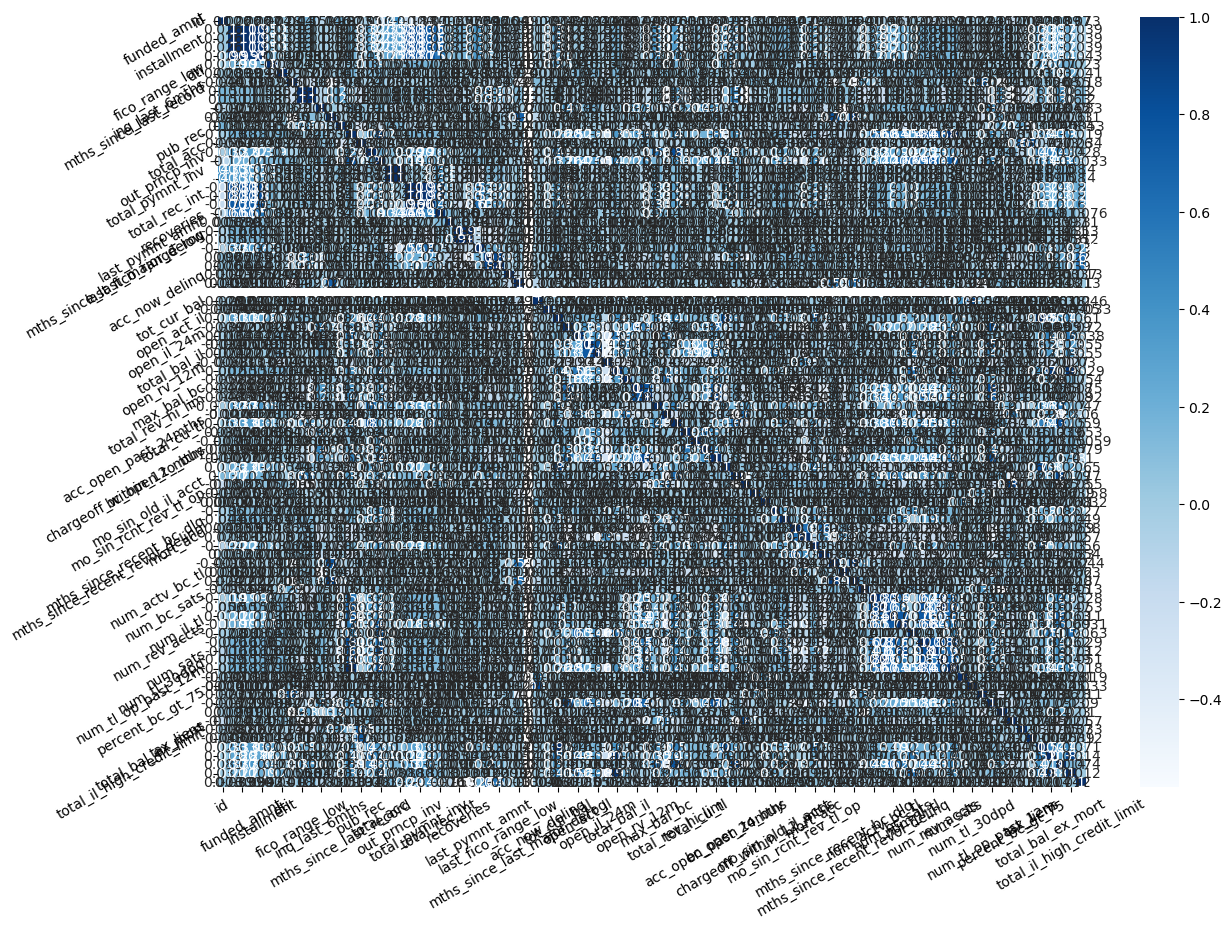

In [86]:
import seaborn as sns
# Heat map
fig = plt.figure(figsize=(14,10))
sns.heatmap(correlationMatrix, annot=True, cmap=plt.colormaps()[8])
plt.xticks(rotation = 30);
plt.yticks(rotation = 30);